In [28]:

# Assuming 100 gamblers with 100,000 each, and everyone wants to play 100,000 times. 

import numpy as np

gamblers = 100

def casino(win_rate, 
           win_once=1, 
           lose_once=1, 
           commission=0.01):
    
    my_money = 100000
    play_cnt = 100000
    commission = commission
    
    for _ in np.arange(1, play_cnt):
        
        w = np.random.binomial(1, win_rate)
        
        if w:
            my_money += win_once
        else:
            my_money -= lose_once
            
            if my_money <= 0:
                break
            
    return my_money

(array([0.00017313, 0.        , 0.        , 0.00051939, 0.00051939,
        0.00017313, 0.00017313, 0.00121191, 0.00034626, 0.00051939,
        0.00155817, 0.00155817, 0.00086565, 0.00121191, 0.00103878,
        0.00051939, 0.00103878, 0.0017313 , 0.00103878, 0.00103878,
        0.00086565, 0.00034626, 0.00051939, 0.00017313, 0.00017313]),
 array([ 99187.  ,  99244.76,  99302.52,  99360.28,  99418.04,  99475.8 ,
         99533.56,  99591.32,  99649.08,  99706.84,  99764.6 ,  99822.36,
         99880.12,  99937.88,  99995.64, 100053.4 , 100111.16, 100168.92,
        100226.68, 100284.44, 100342.2 , 100399.96, 100457.72, 100515.48,
        100573.24, 100631.  ]),
 <a list of 25 Patch objects>)

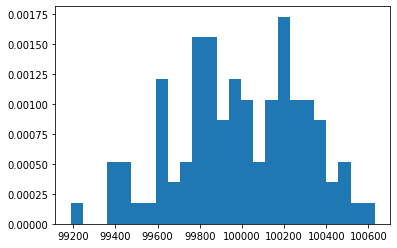

In [29]:

# Assuming no cheaters, no commissions, and 50% win

en_moneys = []
    
from concurrent.futures import ThreadPoolExecutor
from matplotlib import pyplot

# Callback function
def done_callback(r):
    # done_callback runs on the main process
    en_moneys.append(r.result())

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, win_rate=0.5, commission=0)
        future_result.add_done_callback(done_callback)

pyplot.hist(en_moneys, 
            bins=25, 
            density=True)


(array([0.00035261, 0.0001763 , 0.00035261, 0.00035261, 0.00035261,
        0.00052891, 0.00035261, 0.00070522, 0.00052891, 0.00158674,
        0.00088152, 0.00282087, 0.00105783, 0.00105783, 0.00035261,
        0.00088152, 0.        , 0.00123413, 0.00052891, 0.00088152,
        0.00176305, 0.00052891, 0.        , 0.0001763 , 0.0001763 ]),
 array([79283.  , 79339.72, 79396.44, 79453.16, 79509.88, 79566.6 ,
        79623.32, 79680.04, 79736.76, 79793.48, 79850.2 , 79906.92,
        79963.64, 80020.36, 80077.08, 80133.8 , 80190.52, 80247.24,
        80303.96, 80360.68, 80417.4 , 80474.12, 80530.84, 80587.56,
        80644.28, 80701.  ]),
 <a list of 25 Patch objects>)

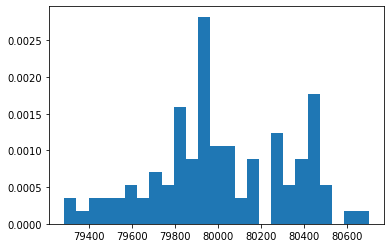

In [30]:

en_moneys = []

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, win_rate=0.4, commission=0)
        future_result.add_done_callback(done_callback)
        
pyplot.hist(en_moneys, 
            bins=25, 
            density=True)


(array([0.00036179, 0.        , 0.        , 0.0001809 , 0.00054269,
        0.0001809 , 0.00108538, 0.00090449, 0.00072359, 0.00090449,
        0.00090449, 0.00162808, 0.00162808, 0.00235166, 0.00054269,
        0.00090449, 0.00126628, 0.00090449, 0.00072359, 0.00054269,
        0.0001809 , 0.00054269, 0.00090449, 0.        , 0.0001809 ]),
 array([ 99291.  ,  99346.28,  99401.56,  99456.84,  99512.12,  99567.4 ,
         99622.68,  99677.96,  99733.24,  99788.52,  99843.8 ,  99899.08,
         99954.36, 100009.64, 100064.92, 100120.2 , 100175.48, 100230.76,
        100286.04, 100341.32, 100396.6 , 100451.88, 100507.16, 100562.44,
        100617.72, 100673.  ]),
 <a list of 25 Patch objects>)

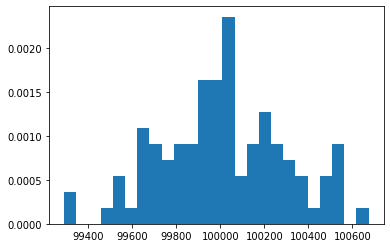

In [31]:

en_moneys = []

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, win_rate=0.5, commission=0.01)
        future_result.add_done_callback(done_callback)
        
pyplot.hist(en_moneys, 
            bins=25, 
            density=True)


(array([0.00020627, 0.00020627, 0.00020627, 0.00082508, 0.00041254,
        0.        , 0.00165017, 0.00103135, 0.00103135, 0.00103135,
        0.00185644, 0.00165017, 0.00082508, 0.00144389, 0.00123762,
        0.00123762, 0.00082508, 0.00185644, 0.00061881, 0.00020627,
        0.00041254, 0.00061881, 0.00103135, 0.        , 0.00020627]),
 array([101374.98000041, 101423.46000041, 101471.94000041, 101520.42000041,
        101568.90000041, 101617.38000041, 101665.86000041, 101714.34000041,
        101762.82000041, 101811.30000041, 101859.78000041, 101908.26000041,
        101956.74000041, 102005.22000041, 102053.70000041, 102102.18000041,
        102150.66000041, 102199.14000041, 102247.62000041, 102296.10000041,
        102344.58000041, 102393.06000041, 102441.54000041, 102490.02000041,
        102538.50000041, 102586.98000041]),
 <a list of 25 Patch objects>)

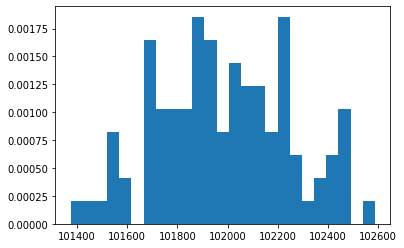

In [32]:

en_moneys = []

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, 
                                    win_rate=0.5, 
                                    win_once=1.02, 
                                    lose_once=0.98, 
                                    commission=0.01)
        future_result.add_done_callback(done_callback)
        
pyplot.hist(en_moneys, 
            bins=25, 
            density=True)


(array([0.00016534, 0.        , 0.00016534, 0.        , 0.        ,
        0.00016534, 0.00049603, 0.00016534, 0.00099206, 0.00165344,
        0.00132275, 0.00115741, 0.00115741, 0.00115741, 0.00115741,
        0.00132275, 0.00049603, 0.00181878, 0.00049603, 0.        ,
        0.00115741, 0.00082672, 0.00016534, 0.00033069, 0.00016534]),
 array([91156.98000041, 91217.46000041, 91277.94000041, 91338.42000041,
        91398.90000041, 91459.38000041, 91519.86000041, 91580.34000041,
        91640.82000041, 91701.30000041, 91761.78000041, 91822.26000041,
        91882.74000041, 91943.22000041, 92003.70000041, 92064.18000041,
        92124.66000041, 92185.14000041, 92245.62000041, 92306.10000041,
        92366.58000041, 92427.06000041, 92487.54000041, 92548.02000041,
        92608.50000041, 92668.98000041]),
 <a list of 25 Patch objects>)

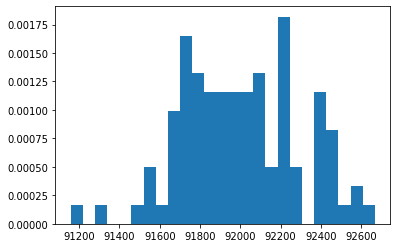

In [33]:
 # Also assuming win_once you make 2%, while lose once, you lose 2%

en_moneys = []

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, 
                                    win_rate=0.45, 
                                    win_once=1.02, 
                                    lose_once=0.98, 
                                    commission=0.01)
        future_result.add_done_callback(done_callback)
        
pyplot.hist(en_moneys, 
            bins=25, 
            density=True)
